In [27]:
!pip install medmnist --quiet

In [28]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator

In [29]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/


In [30]:
data_flag = 'organmnist3d'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

# load the data
train_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

Using downloaded and verified file: /root/.medmnist/organmnist3d.npz


In [35]:
x, y = train_dataset[:]
x.shape, y.shape

((1, 971, 28, 28, 28), (971, 1))

In [32]:
print(list(train_dataset.info["label"].values()))
train_dataset.info["label"]

['liver', 'kidney-right', 'kidney-left', 'femur-right', 'femur-left', 'bladder', 'heart', 'lung-right', 'lung-left', 'spleen', 'pancreas']


{'0': 'liver',
 '1': 'kidney-right',
 '2': 'kidney-left',
 '3': 'femur-right',
 '4': 'femur-left',
 '5': 'bladder',
 '6': 'heart',
 '7': 'lung-right',
 '8': 'lung-left',
 '9': 'spleen',
 '10': 'pancreas'}

In [15]:
import numpy as np
from PIL import Image

imgs = [Image.fromarray(img*255) for img in x[0][1]]
# duration is the number of milliseconds between frames; this is 40 frames per second
imgs[0].save("array.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)

In [36]:
y = y[:,0]
y.shape

(971,)

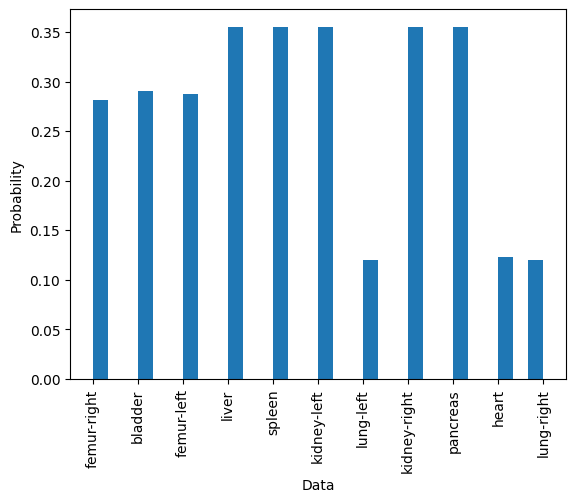

In [40]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)
labels = list(train_dataset.info["label"].values())
data = [labels[i] for i in y]

plt.hist(data, density=True, bins=30)  # density=False would make counts
plt.xticks(rotation=90)
plt.ylabel('Probability')
plt.xlabel('Data');